In [2]:
#Social_Network_Ads.csv

**Importing the libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
len(df)

400

In [7]:
gender_encode = pd.get_dummies(df.Gender)

In [8]:
df = pd.concat([df, gender_encode], axis = 1)
df.drop(['Gender', 'User ID'], axis = 1, inplace = True)

In [9]:
df['Purchased'] = df['Purchased'].map({0 : 'False', 1 : 'True'})

**Splitting the dataset into the Training set and Test set**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(['Purchased'], axis = 1)

y = df[['Purchased']]

names = X.columns

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)

In [16]:
X_train = pd.DataFrame(X_train, columns = [names])
X_test = pd.DataFrame(X_test, columns = [names])

**Fitting Decision Tree Classification to the Training set**

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [32]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

**Predicting the Test set results**

In [33]:
y_pred = dtc.predict(X_test)

**Making the Confusion Matrix**

In [21]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


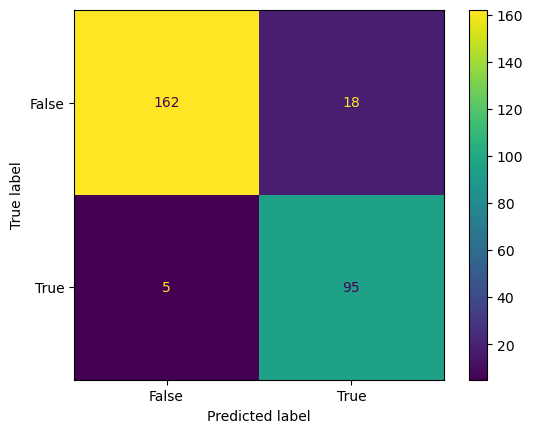

In [36]:
plot_confusion_matrix(dtc, X_train, y_train)

**Visualising the Training set results**

In [23]:
target = list(df['Purchased'].unique())

feature_names = list(X.columns)

In [24]:
#pip install pydotplus

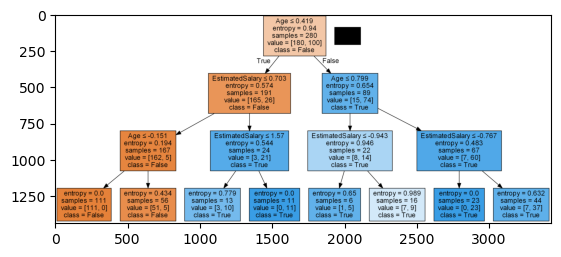

In [35]:
import graphviz
from sklearn import tree
import pydotplus
# DOT data

dot_data = tree.export_graphviz(dtc, out_file = None, feature_names = feature_names, class_names = target, filled = True,
                                special_characters=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png")
#graph
pydot_graph = pydotplus.graph_from_dot_data(dot_data)

pydot_graph.write_png('original_tree.png')

pydot_graph.set_size('"50,15!"')

pydot_graph.write_png('resized_tree.png')

tree_1 = plt.imread('resized_tree.png')

imgplot = plt.imshow(tree_1)


**Visualising the Test set results**

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


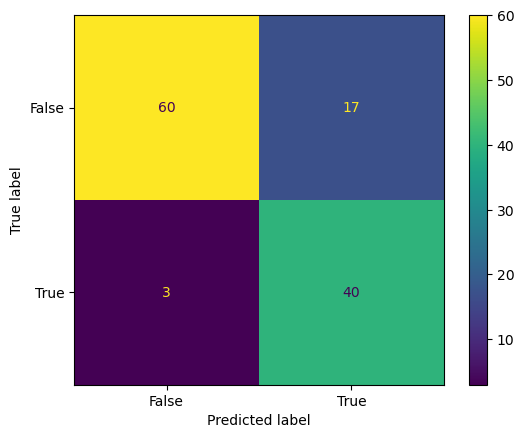

In [37]:
plot_confusion_matrix(dtc, X_test, y_test)

In [39]:
dtc_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

dtc_1.fit(X_test, y_test)

y_pred = dtc_1.predict(X_test)

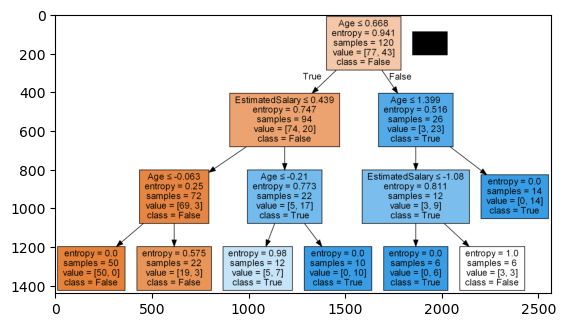

In [40]:
# DOT data

dot_data = tree.export_graphviz(dtc_1, out_file = None, feature_names = feature_names, class_names = target, filled = True,
                                special_characters=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png")
#graph
pydot_graph = pydotplus.graph_from_dot_data(dot_data)

pydot_graph.write_png('original_tree.png')

pydot_graph.set_size('"50,15!"')

pydot_graph.write_png('resized_tree.png')

tree_1 = plt.imread('resized_tree.png')

imgplot = plt.imshow(tree_1)
